___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('covtype.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


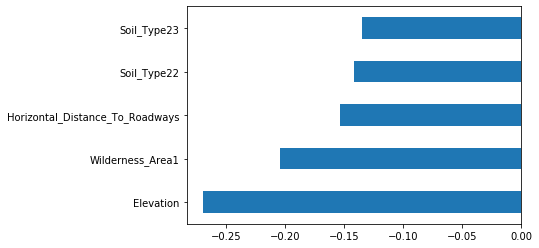

In [7]:
df.corr()['Cover_Type'].sort_values().head().plot.barh()

In [8]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


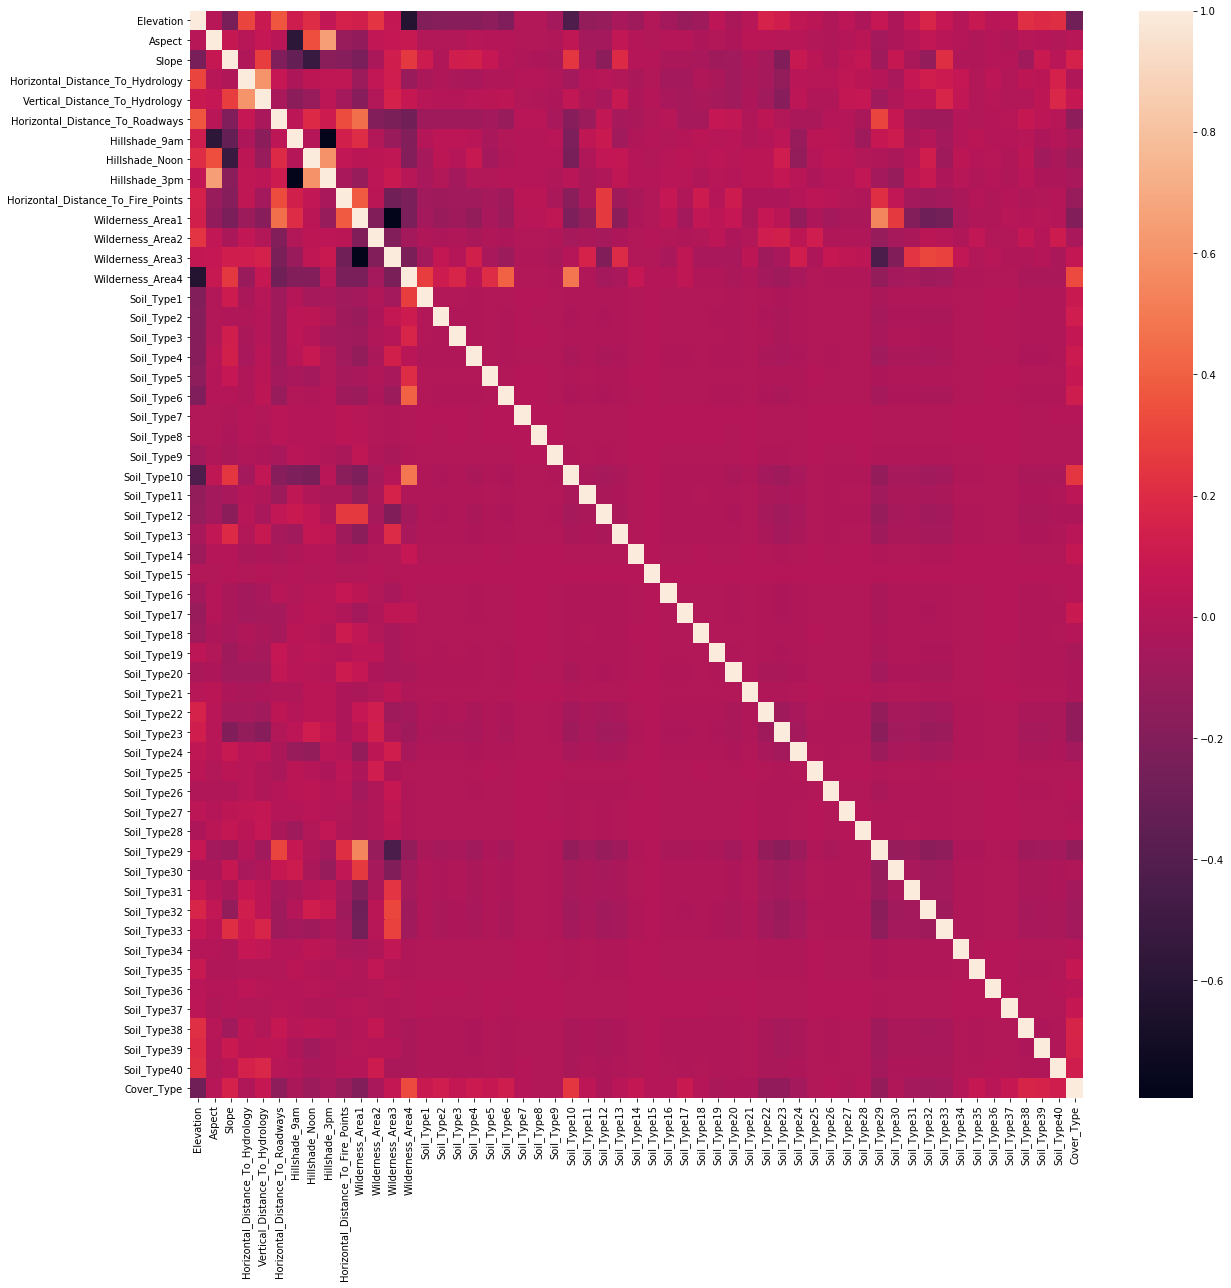

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [10]:
df.corr()[['Cover_Type', 'Wilderness_Area4']]

,Cover_Type,Wilderness_Area4
Elevation,-0.269554,-0.619374
Aspect,0.017080,0.082687
Slope,0.148285,0.255503
Horizontal_Distance_To_Hydrology,-0.020317,-0.100433
Vertical_Distance_To_Hydrology,0.081664,0.077792
Horizontal_Distance_To_Roadways,-0.153450,-0.270349
Hillshade_9am,-0.035415,-0.200282
Hillshade_Noon,-0.096426,-0.195733
Hillshade_3pm,-0.048290,0.018860
Horizontal_Distance_To_Fire_Points,-0.108936,-0.236548


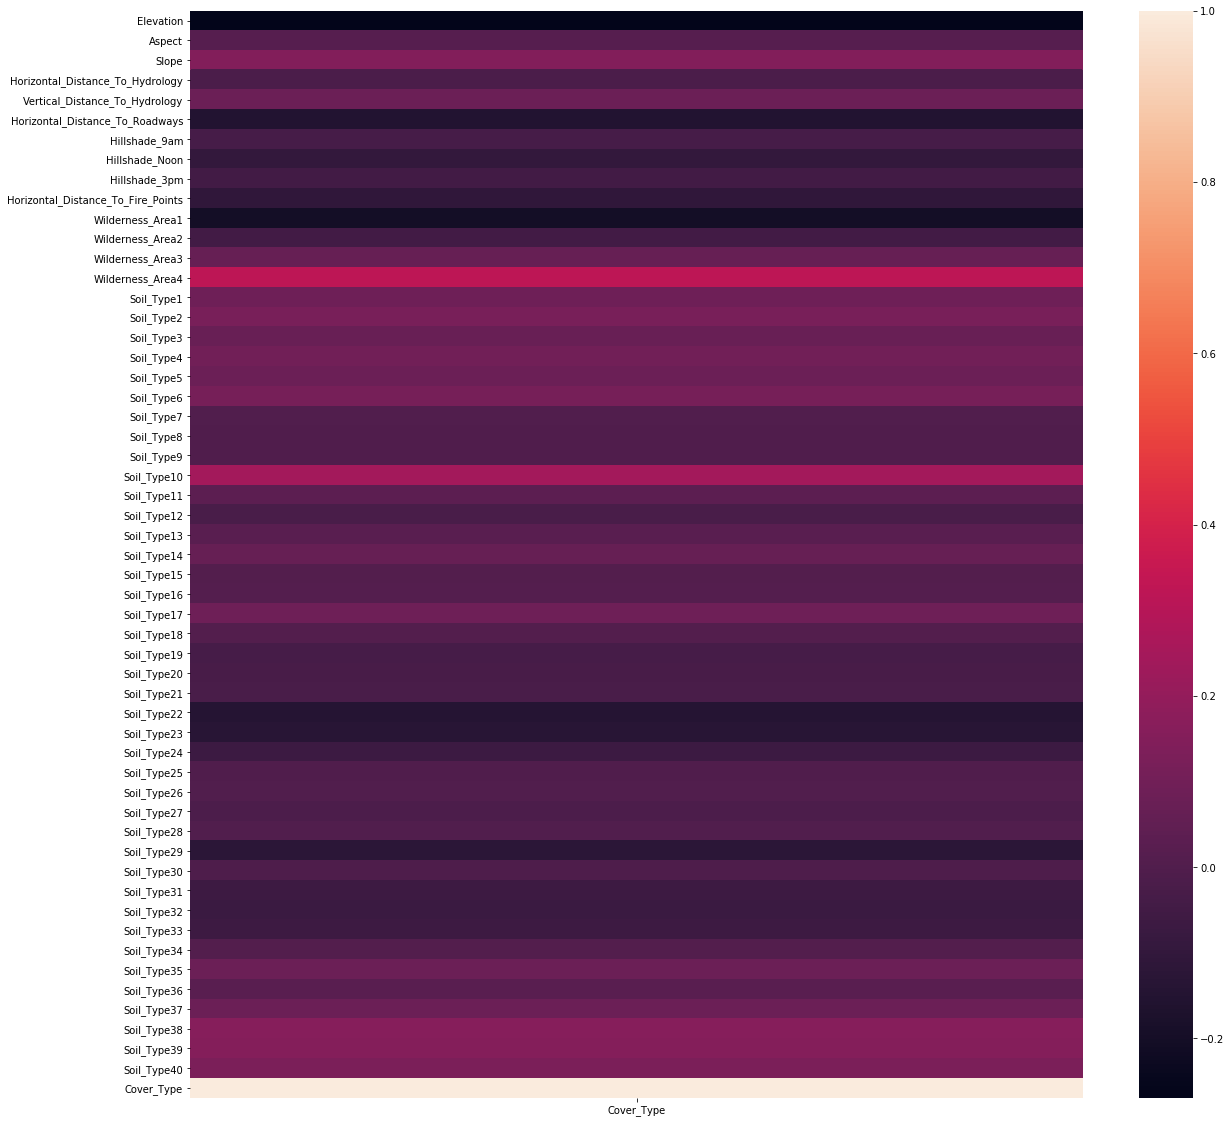

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr()[['Cover_Type']])

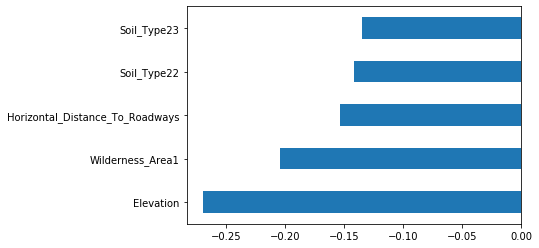

In [12]:
df.corr()['Cover_Type'].sort_values().head().plot.barh()

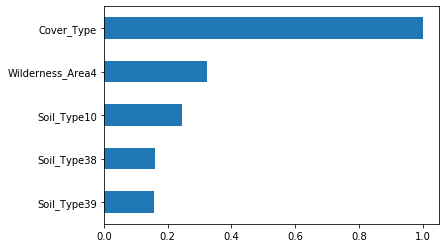

In [13]:
df.corr()['Cover_Type'].sort_values().tail().plot.barh()

***
***

In [14]:
df.isnull().any()

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
Wilderness_Area1                      False
Wilderness_Area2                      False
Wilderness_Area3                      False
Wilderness_Area4                      False
Soil_Type1                            False
Soil_Type2                            False
Soil_Type3                            False
Soil_Type4                            False
Soil_Type5                            False
Soil_Type6                            False
Soil_Type7                            False
Soil_Type8                            False
Soil_Type9                      

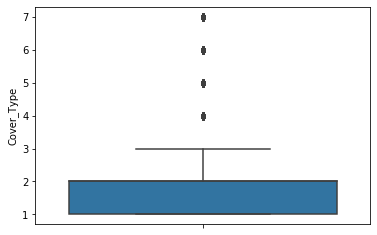

In [15]:
sns.boxplot(df.Cover_Type, orient='v')

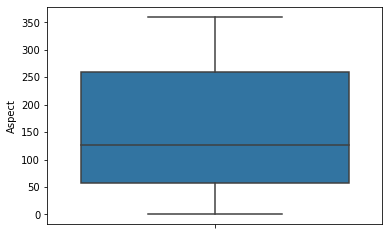

In [16]:
sns.boxplot(df.Aspect, orient='v')

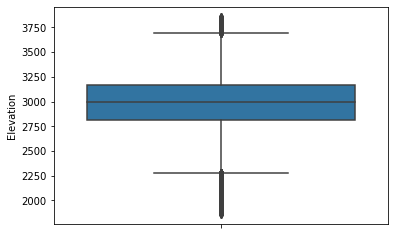

In [17]:
sns.boxplot(df.Elevation, orient='v')

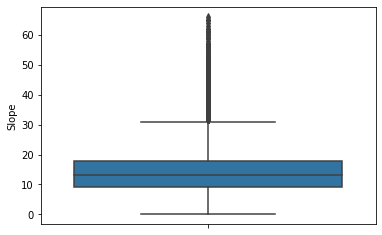

In [18]:
sns.boxplot(df.Slope, orient='v')

In [3]:
numeric = []
for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [4]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

In [5]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [6]:
def detect_outliers(df, col_name):
    '''
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

(<module 'matplotlib.pyplot' from '/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>,
     threshold  outlier_count         pct
 0         1.0         138987    8.036723
 1         1.1         127817    9.264808
 2         1.2         115975   12.627721
 3         1.3         101330   15.198855
 4         1.4          85929   21.877364
 5         1.5          67130   29.690153
 6         1.6          47199   43.672535
 7         1.7          26586   87.937260
 8         1.8           3207  100.000000
 9         1.9              0         NaN
 10        2.0              0         NaN
 11        2.1              0         NaN
 12        2.2              0         NaN
 13        2.3              0         NaN
 14        2.4              0         NaN
 15        2.5              0         NaN
 16        2.6              0         NaN
 17        2.7              0         NaN
 18        2.8              0         NaN
 19        2.9              0         NaN
 20 

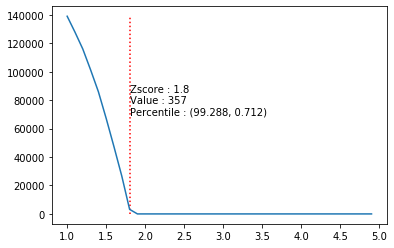

In [21]:
outlier_zscore(df,'Aspect')

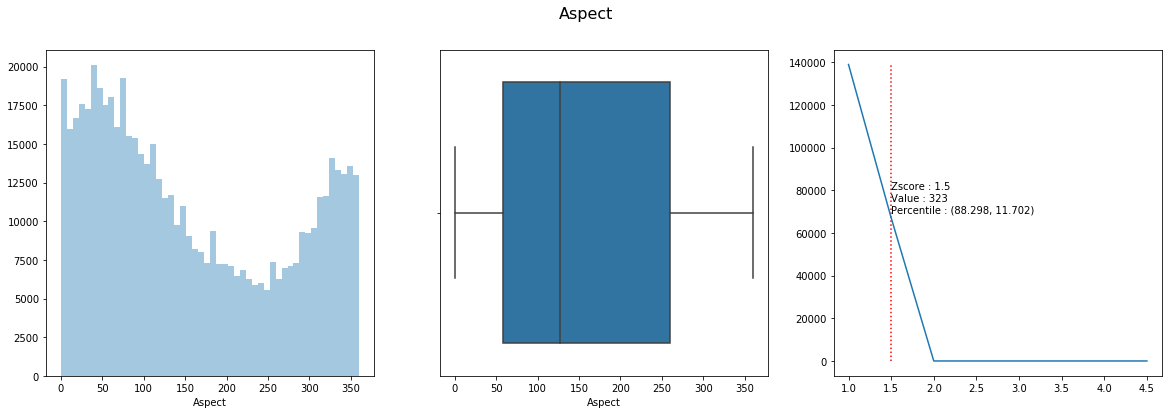

In [22]:
outlier_inspect(df, 'Aspect')

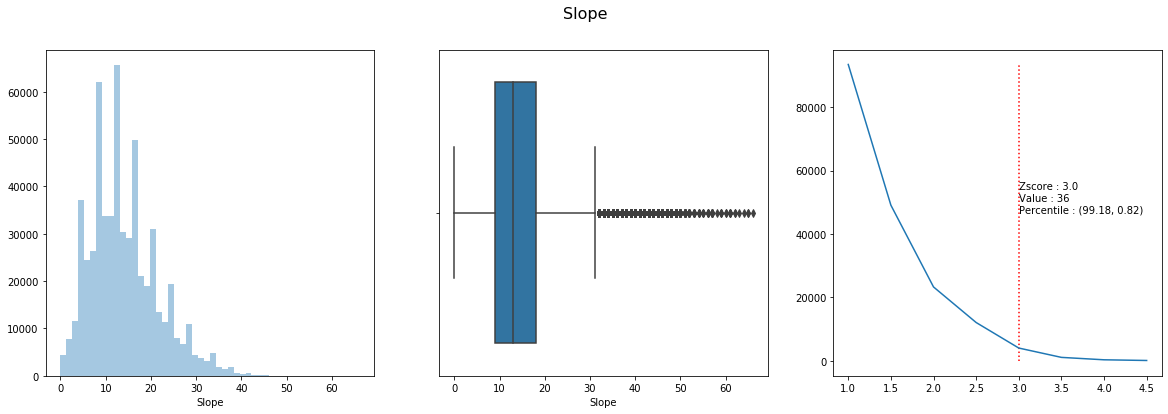

In [23]:
outlier_inspect(df, 'Slope')

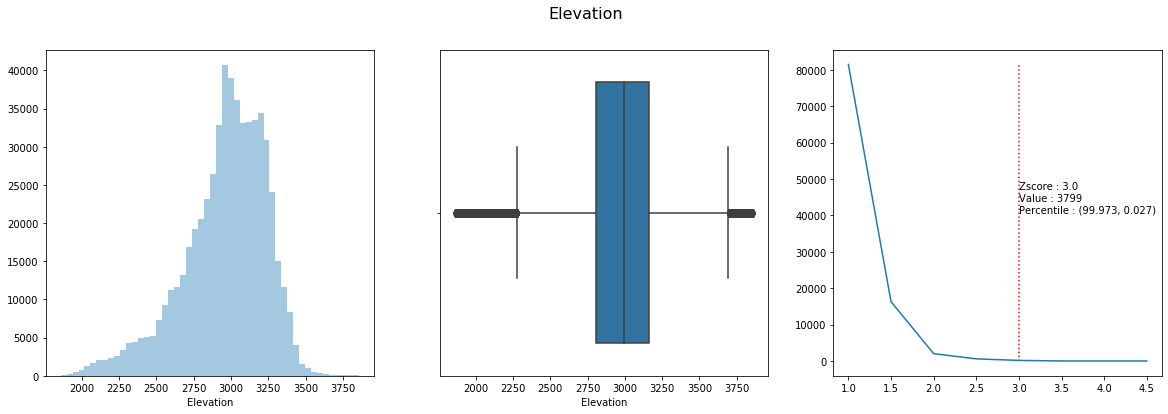

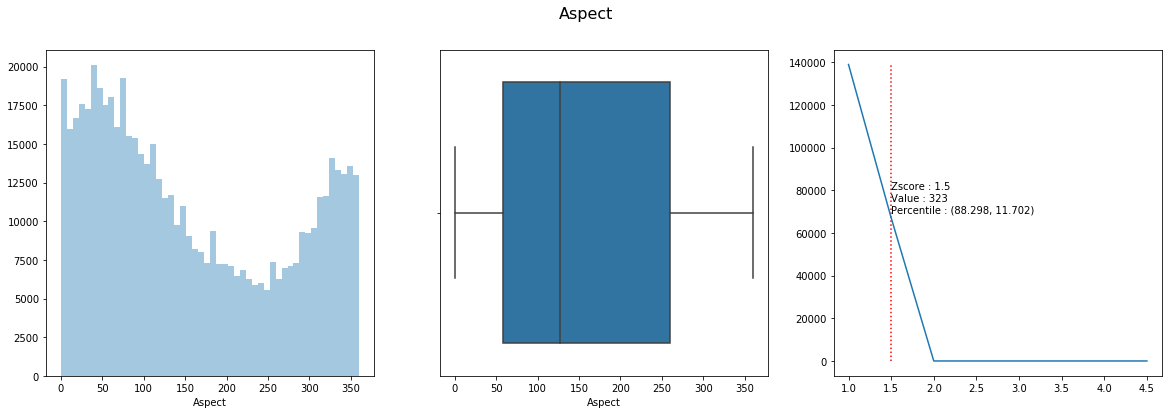

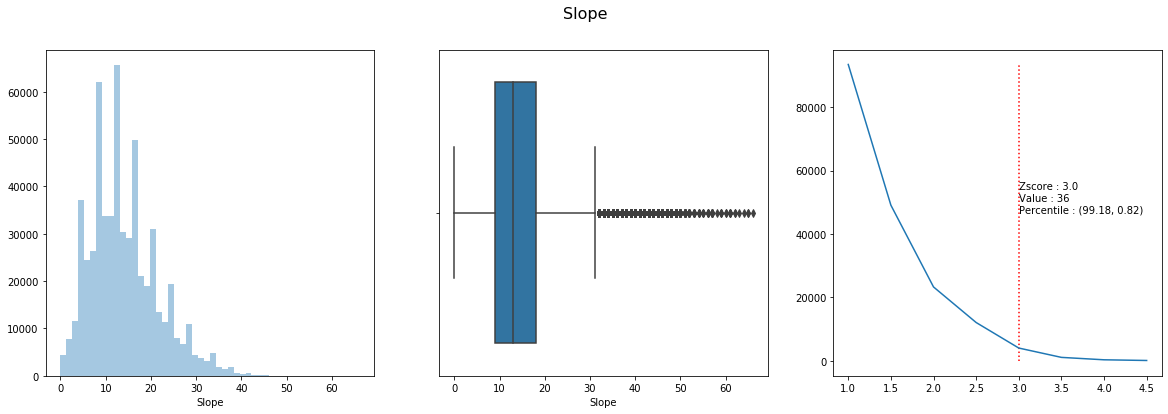

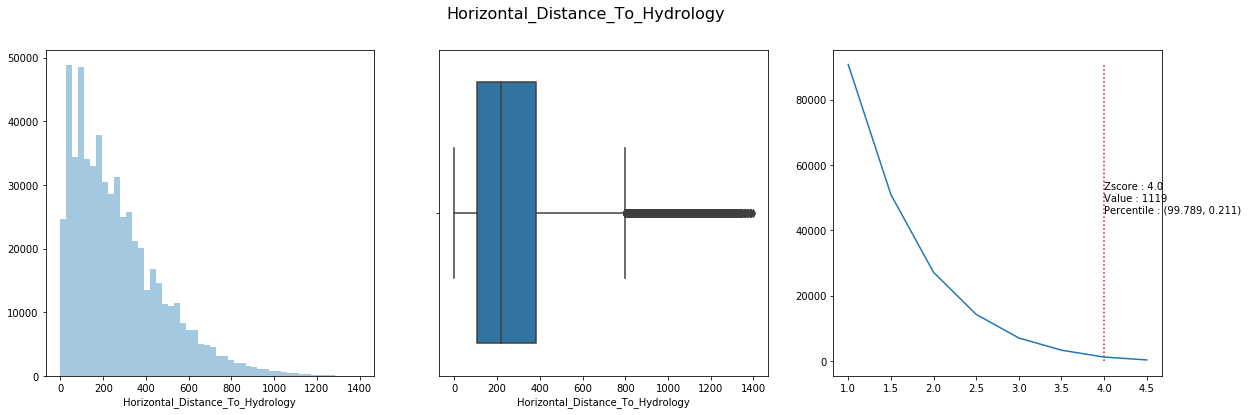

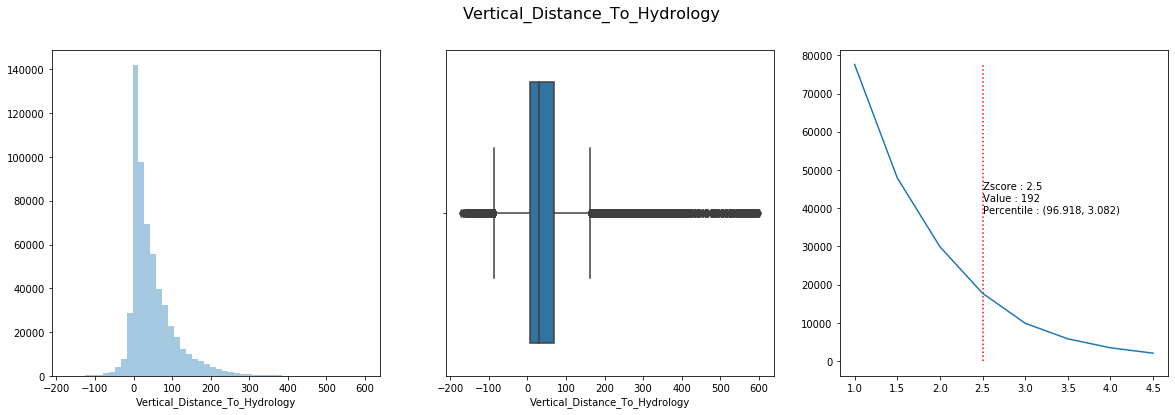

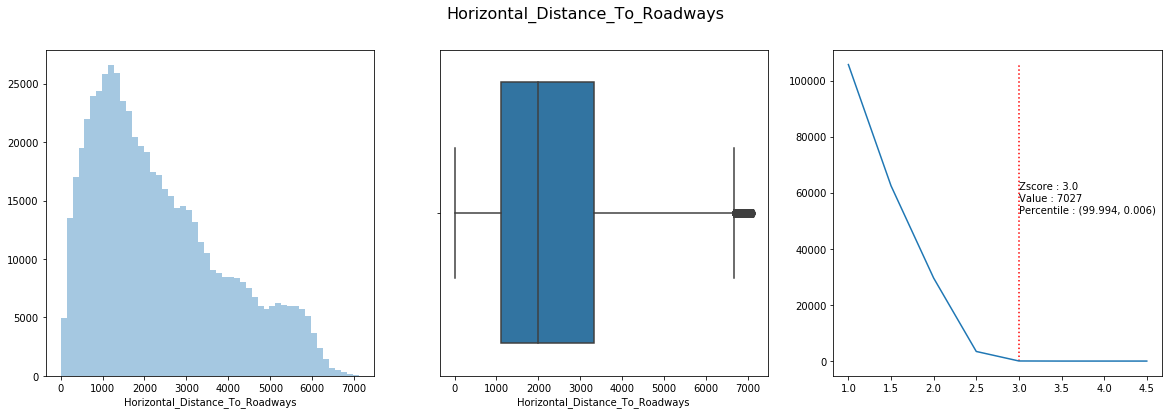

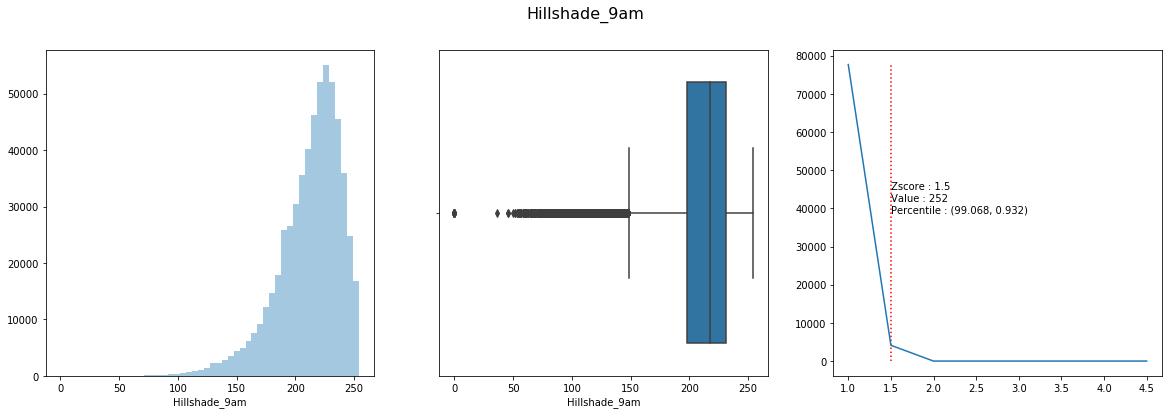

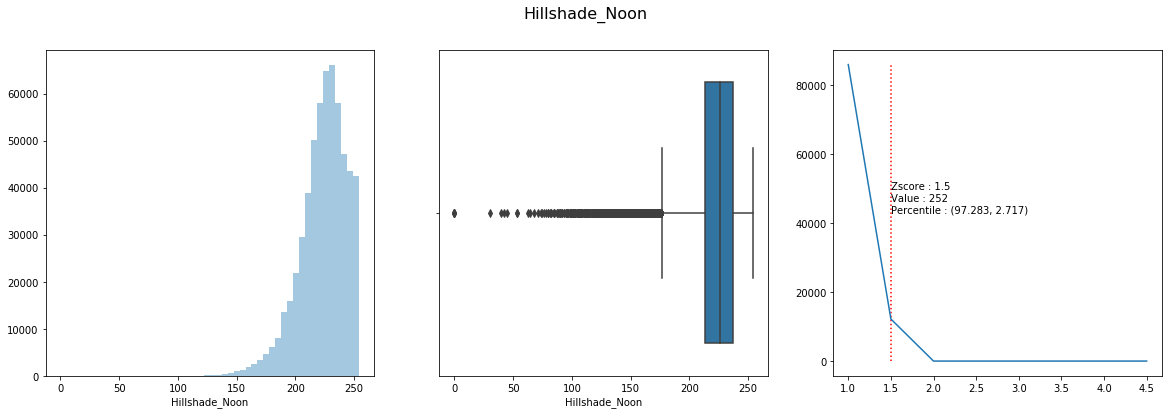

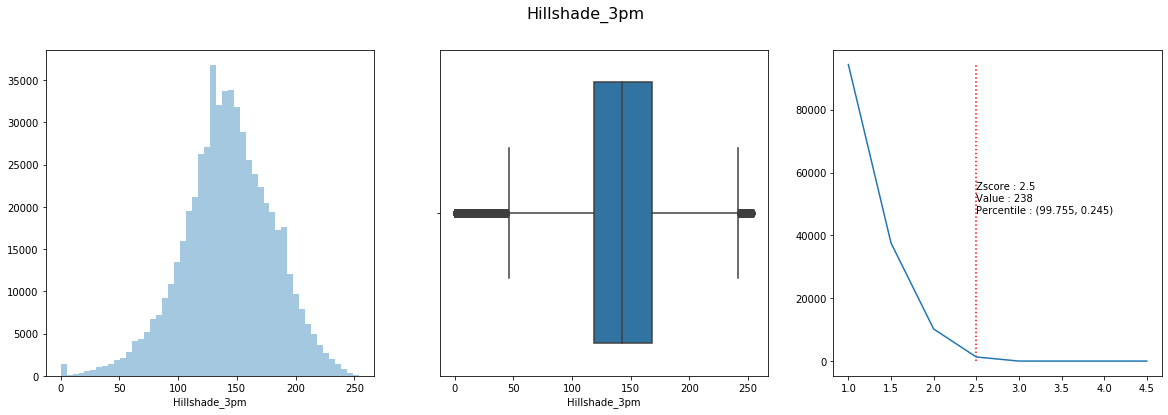

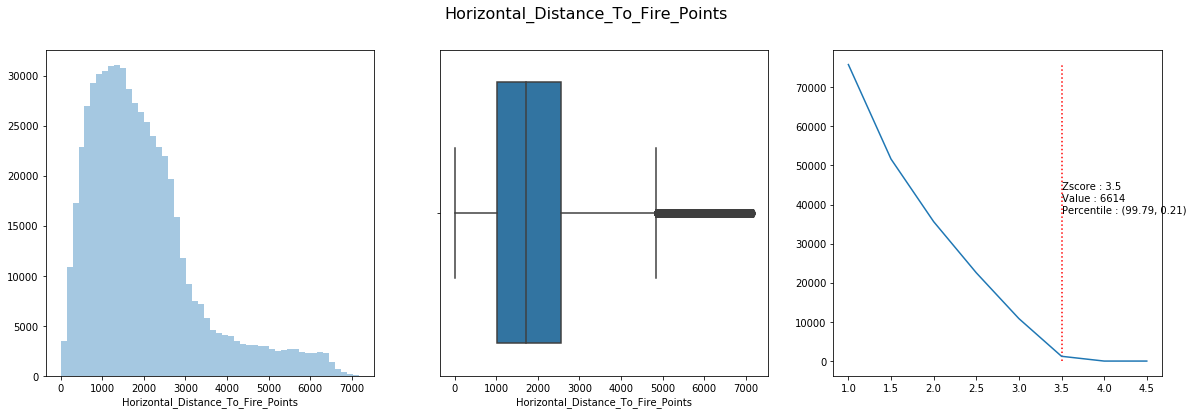

In [43]:
for col in numeric:
    outlier_inspect(df, col)

In [16]:
for col in numeric:
    if detect_outliers(df, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(df, col)[2], col))

There are 275 outliers in Slope
There are 414 outliers in Horizontal_Distance_To_Hydrology
There are 5339 outliers in Vertical_Distance_To_Hydrology
There are 1027 outliers in Hillshade_9am
There are 1191 outliers in Hillshade_Noon
There are 10 outliers in Horizontal_Distance_To_Fire_Points


#### *ii. Drop Outliers*

You can define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value you choose according to the result from the previous functions.

***
***

## 3. Feature Engineering with *sqlite3* Library

Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

In [33]:
tree = df

In [34]:
tree1 = tree[(tree['Slope'] > detect_outliers(tree, 'Slope')[0]) &
              (tree['Slope'] < detect_outliers(tree, 'Slope')[1])]
tree1.shape

(580640, 55)

In [35]:
tree1 = tree1[(tree1['Horizontal_Distance_To_Fire_Points'] > detect_outliers(tree1, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (tree1['Horizontal_Distance_To_Fire_Points'] < detect_outliers(tree1, 'Horizontal_Distance_To_Fire_Points')[1])]
tree1.shape

(580630, 55)

In [36]:
tree1 = tree1[(tree1['Horizontal_Distance_To_Hydrology'] > detect_outliers(tree1, 'Horizontal_Distance_To_Hydrology')[0]) &
              (tree1['Horizontal_Distance_To_Hydrology'] < detect_outliers(tree1, 'Horizontal_Distance_To_Hydrology')[1])]
tree1.shape

(580216, 55)

In [37]:
tree1 = tree1[(tree1['Vertical_Distance_To_Hydrology'] > detect_outliers(tree1, 'Vertical_Distance_To_Hydrology')[0]) &
              (tree1['Vertical_Distance_To_Hydrology'] < detect_outliers(tree1, 'Vertical_Distance_To_Hydrology')[1])]
tree1.shape

(574967, 55)

In [38]:
import sqlite3

In [39]:
# Creation of the connection and importing dataframe into database.
with sqlite3.connect("tree_database.db") as cnnct:
    tree1.to_sql("covtype2", cnnct, if_exists = "replace")

In [40]:
query1 = """SELECT *,
(Horizontal_Distance_To_Hydrology*Horizontal_Distance_To_Hydrology)+(Vertical_Distance_To_Hydrology*Vertical_Distance_To_Hydrology) as Square_Hypo_Distance,
(Horizontal_Distance_To_Hydrology + Horizontal_Distance_To_Roadways)/2 as Average_Dist_Road_Hydro, (Elevation + Vertical_Distance_To_Hydrology) /2 as Average_Elevation_Hydro
FROM covtype2;"""

In [41]:
query2 = """SELECT Elevation, Aspect, Slope, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3,
Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6,
Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type16, Soil_Type17,
Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type22, Soil_Type23, Soil_Type24,
Soil_Type26, Soil_Type27, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33,
Soil_Type34, Soil_Type35, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type,
Square_Hypo_Distance, Average_Dist_Road_Hydro, Average_Elevation_Hydro
FROM covtype2;"""

In [42]:
with sqlite3.connect("tree_database.db") as cnnct:
    df1 = pd.read_sql_query(query1, cnnct)  # transforming and exporting to df1
    df1.to_sql("covtype2", cnnct, if_exists = "replace")  # importing again to dropping columns
    df2 = pd.read_sql_query(query2, cnnct)  # exporting table to df2

In [43]:
df2.to_csv('covtype2.csv', index=False)

In [44]:
tree = pd.read_csv('covtype2.csv')

In [47]:
tree [['Horizontal_Distance_To_Roadways', 'Average_Dist_Road_Hydro', 'Elevation','Average_Elevation_Hydro']].corr()

,Horizontal_Distance_To_Roadways,Average_Dist_Road_Hydro,Elevation,Average_Elevation_Hydro
Horizontal_Distance_To_Roadways,1.000000,0.991667,0.364335,0.345422
Average_Dist_Road_Hydro,0.991667,1.000000,0.396028,0.389907
Elevation,0.364335,0.396028,1.000000,0.983383
Average_Elevation_Hydro,0.345422,0.389907,0.983383,1.000000


In [46]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574967 entries, 0 to 574966
Data columns (total 46 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           574967 non-null  int64
 1   Aspect                              574967 non-null  int64
 2   Slope                               574967 non-null  int64
 3   Horizontal_Distance_To_Roadways     574967 non-null  int64
 4   Hillshade_9am                       574967 non-null  int64
 5   Hillshade_Noon                      574967 non-null  int64
 6   Horizontal_Distance_To_Fire_Points  574967 non-null  int64
 7   Wilderness_Area1                    574967 non-null  int64
 8   Wilderness_Area2                    574967 non-null  int64
 9   Wilderness_Area3                    574967 non-null  int64
 10  Wilderness_Area4                    574967 non-null  int64
 11  Soil_Type1                          574967 non-null 

In [ ]:
df_sample = df.sample(100000)

In [ ]:
X=tree_sample.drop(["Cover_Type"], axis=1)
y= tree_sample['Cover_Type']

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [24]:
df_sample = df.sample(100000)

In [25]:
X=df_sample.drop(["Cover_Type"], axis=1)
y= df_sample['Cover_Type']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Implement KNeighborsClassifer

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
scaler = StandardScaler()

In [23]:
X_train_s = scaler.fit_transform(X_train)

In [24]:
X_test_s = scaler.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [35]:
knn.fit(X_train_s,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [36]:


pred = knn.predict(X_test_s)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 9412  1244     2     0    16     7   122]
 [ 1221 13133    87     0   119    95    17]
 [    6    81  1601    22    10   192     0]
 [    0     0    38   101     0    16     0]
 [   35   127     5     0   332     5     0]
 [    4    79   164    12     2   629     0]
 [  113    15     0     0     1     0   935]]
              precision    recall  f1-score   support

           1       0.87      0.87      0.87     10803
           2       0.89      0.90      0.89     14672
           3       0.84      0.84      0.84      1912
           4       0.75      0.65      0.70       155
           5       0.69      0.66      0.67       504
           6       0.67      0.71      0.69       890
           7       0.87      0.88      0.87      1064

    accuracy                           0.87     30000
   macro avg       0.80      0.79      0.79     30000
weighted avg       0.87      0.87      0.87     30000



In [26]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

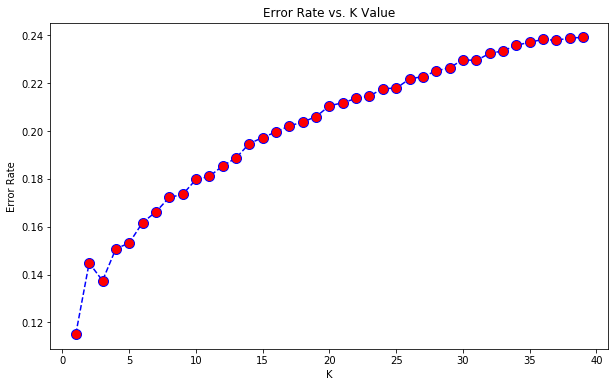

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
pred = dtree.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 9238  1411     2     0    24     4   149]
 [ 1382 12939    88     0   168    80    20]
 [    0    98  1612    25    10   143     0]
 [    0     1    34   105     0    15     0]
 [   22   155     7     0   330     2     0]
 [    2    86   158     4     4   624     0]
 [  144    11     0     0     0     0   903]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.85     10828
           2       0.88      0.88      0.88     14677
           3       0.85      0.85      0.85      1888
           4       0.78      0.68      0.73       155
           5       0.62      0.64      0.63       516
           6       0.72      0.71      0.71       878
           7       0.84      0.85      0.85      1058

    accuracy                           0.86     30000
   macro avg       0.79      0.78      0.79     30000
weighted avg       0.86      0.86      0.86     30000



In [30]:
from sklearn import tree

In [31]:
df_sample.Cover_Type.value_counts()

2    48803
1    36295
3     6157
7     3605
6     3005
5     1647
4      488
Name: Cover_Type, dtype: int64

In [33]:
features = list(df_sample.columns[:len(df_sample.columns)-1])
targets = ['1', '2', '3', '4','5','6','7']

In [ ]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(dtree,filled=True,feature_names=features ,class_names = targets)

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
pred = rfc.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 9465  1311     0     0     5     1    46]
 [  752 13789    69     0    25    40     2]
 [    1    75  1743    11     0    58     0]
 [    0     0    42   109     0     4     0]
 [   14   221     4     0   274     3     0]
 [    0    72   156     4     0   646     0]
 [  127     7     0     0     0     0   924]]
              precision    recall  f1-score   support

           1       0.91      0.87      0.89     10828
           2       0.89      0.94      0.91     14677
           3       0.87      0.92      0.89      1888
           4       0.88      0.70      0.78       155
           5       0.90      0.53      0.67       516
           6       0.86      0.74      0.79       878
           7       0.95      0.87      0.91      1058

    accuracy                           0.90     30000
   macro avg       0.89      0.80      0.84     30000
weighted avg       0.90      0.90      0.90     30000



### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [22]:
from xgboost import XGBClassifier

In [27]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
pred = xgb_classifier.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 7767  2939     2     0     1     2    92]
 [ 2451 12102   134     3     6    51     4]
 [    0   247  1539    20     0    60     0]
 [    0     1    55    94     0     2     0]
 [    3   415    13     0    47     0     0]
 [    0   242   518     6     0   103     0]
 [  532     6     0     0     0     0   543]]
              precision    recall  f1-score   support

           1       0.72      0.72      0.72     10803
           2       0.76      0.82      0.79     14751
           3       0.68      0.82      0.75      1866
           4       0.76      0.62      0.68       152
           5       0.87      0.10      0.18       478
           6       0.47      0.12      0.19       869
           7       0.85      0.50      0.63      1081

    accuracy                           0.74     30000
   macro avg       0.73      0.53      0.56     30000
weighted avg       0.74      0.74      0.73     30000



In [32]:
xgb_model5 = XGBClassifier(n_estimators = 500,  learning_rate = 0.4, max_depth= 33, subsample =0.8, n_jobs = -1, min_samples_split =3 ).fit(X_train, y_train,
             early_stopping_rounds=15,
             eval_set=[(X_test, y_test)],
             verbose=True)

[0]	validation_0-merror:0.152767
Will train until validation_0-merror hasn't improved in 15 rounds.
[1]	validation_0-merror:0.126567
[2]	validation_0-merror:0.112733
[3]	validation_0-merror:0.105467
[4]	validation_0-merror:0.1007
[5]	validation_0-merror:0.097233
[6]	validation_0-merror:0.093067
[7]	validation_0-merror:0.090933
[8]	validation_0-merror:0.0888
[9]	validation_0-merror:0.087233
[10]	validation_0-merror:0.086
[11]	validation_0-merror:0.0851
[12]	validation_0-merror:0.0839
[13]	validation_0-merror:0.0824
[14]	validation_0-merror:0.081967
[15]	validation_0-merror:0.081167
[16]	validation_0-merror:0.080833
[17]	validation_0-merror:0.080733
[18]	validation_0-merror:0.08
[19]	validation_0-merror:0.078967
[20]	validation_0-merror:0.0786
[21]	validation_0-merror:0.0784
[22]	validation_0-merror:0.078167
[23]	validation_0-merror:0.0779
[24]	validation_0-merror:0.078033
[25]	validation_0-merror:0.0777
[26]	validation_0-merror:0.077067
[27]	validation_0-merror:0.076667
[28]	validation_

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [28]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_s, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
pred = svc.predict(X_test_s)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 7905  2710     2     0     0     3   208]
 [ 2069 12308   207     2     9    68    14]
 [    0   144  1666    10     0    68     0]
 [    0     1   106    27     0    21     0]
 [    5   463    12     0    36     0     0]
 [    0   193   426     1     0   258     0]
 [  308     9     0     0     0     0   741]]
              precision    recall  f1-score   support

           1       0.77      0.73      0.75     10828
           2       0.78      0.84      0.81     14677
           3       0.69      0.88      0.77      1888
           4       0.68      0.17      0.28       155
           5       0.80      0.07      0.13       516
           6       0.62      0.29      0.40       878
           7       0.77      0.70      0.73      1058

    accuracy                           0.76     30000
   macro avg       0.73      0.53      0.55     30000
weighted avg       0.76      0.76      0.75     30000



### Compare The Models

So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

In [ ]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forest", "XGBoost", "Decision Tree"],
                        "Accuracy": [knn_accuracy, rf_accuracy, xgb_accuracy, tree_accuracy]})
compare = compare.sort_values(by="Accuracy", ascending=True)
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___